In [93]:
# Loading package

import numpy as np
import pandas as pd
import re
import seaborn as sns

import os



### Load data

In [94]:
def open_csvfile(filename):
    pwd = os.getcwd()
    path_dir = pwd
    filename = filename
    
    path: str = path_dir + '\\' + filename
    return path

In [129]:
train= pd.read_csv(open_csvfile('data\\train.csv'))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [130]:
train['Deck'] = train.Cabin.str[:1]
train['Room'] = train.Cabin.str[1:]
del train['Cabin']

In [131]:
dict1 = {
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}

train.Embarked = train.Embarked.map(dict1)

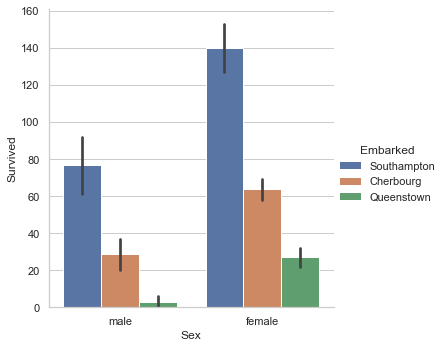

In [132]:
sns.set_theme(style= "whitegrid")

g = sns.catplot(data= train, x = 'Sex', y = 'Survived', hue = 'Embarked', kind = 'bar', estimator = sum)

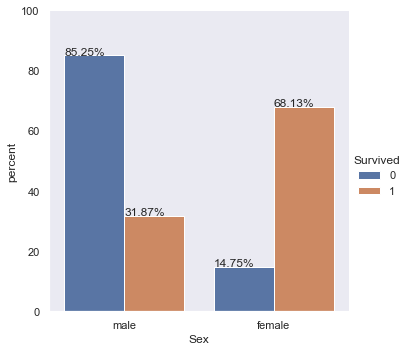

In [133]:
sns.set_theme(style = 'dark')

x,y = 'Sex', 'Survived'
df1 = train.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

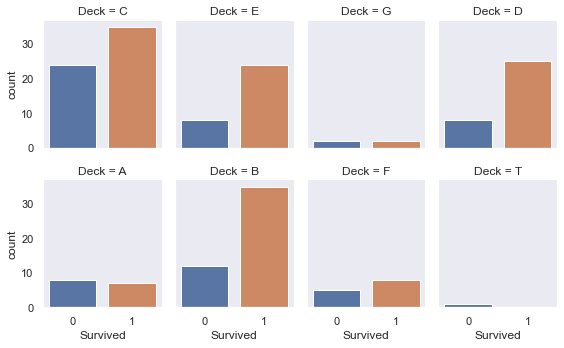

In [141]:
g = sns.catplot(x="Survived", col="Deck", col_wrap=4,
                data=train[train.Deck.notnull()],
                kind="count", height=2.5, aspect=.8)

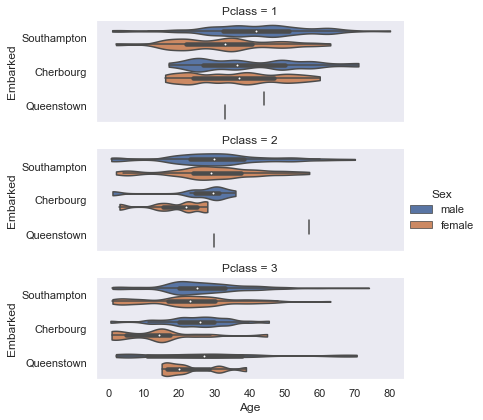

In [144]:
g = sns.catplot(x="Age", y="Embarked",
                hue="Sex", row="Pclass",
                data=train[train.Embarked.notnull()],
                orient="h", height=2, aspect=3,
                kind="violin", dodge=True, cut=0, bw=.2)